In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
import pandas as pd

In [8]:


# Load the data
file_path = '/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv'
data = pd.read_csv(file_path)
# data=data[data['val_pearson_correlation'!=np.nan]]
# Display the first few rows of the dataframe
data.head()
data.columns

Index(['Name', 'Created', 'Runtime', 'Hostname', 'Job Type', 'Notes',
       'GPU Type', 'Tags', 'learning_rate', 'best_epoch', 'best_val_loss',
       'epoch', 'loss', 'mse', 'pearson_correlation', 'val_loss', 'val_mse',
       'val_pearson_correlation'],
      dtype='object')

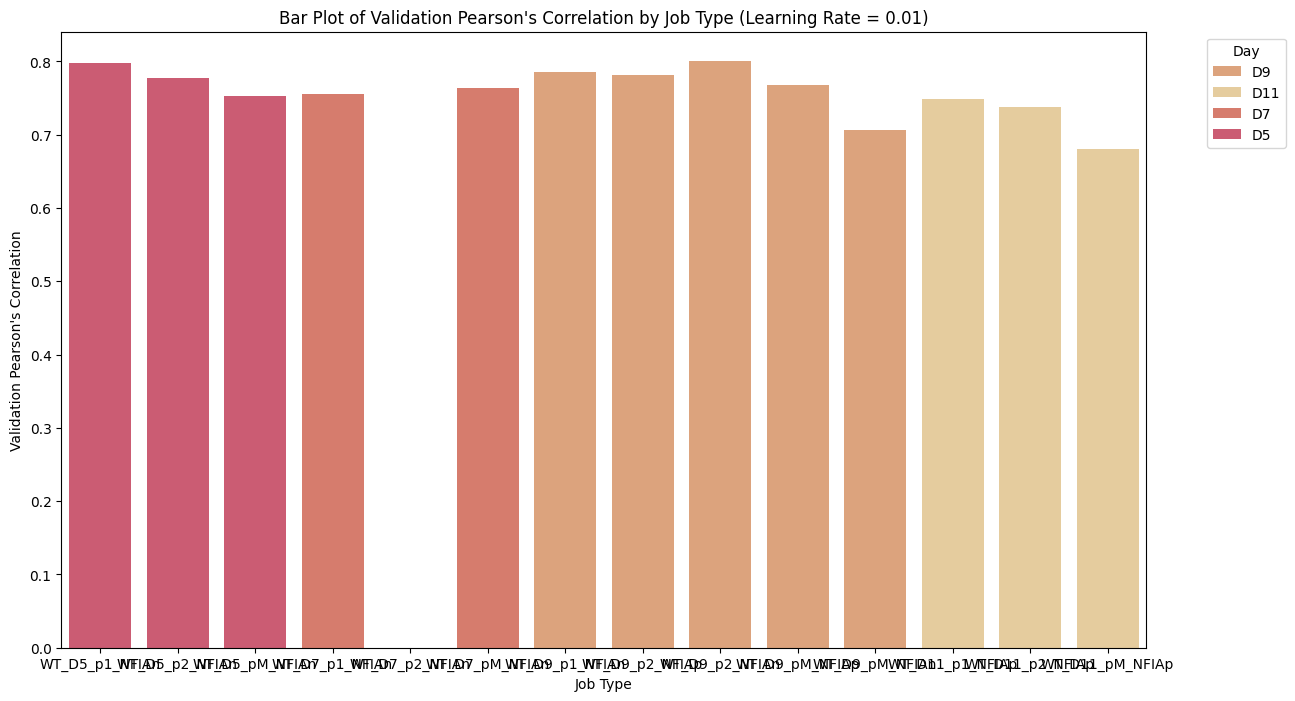

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# data = pd.read_csv('your_data.csv')  # Uncomment and update with your actual file path

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Extract sample day information from Job Type for coloring
data['Sample Day'] = data['Job Type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract day information for consistent color mapping
data['Day'] = data['Job Type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(data['Day'].unique(), key=lambda x: int(x[1:]))

# Predefined colors for specific days
day_colors = {
    'D5': (0.868793, 0.287728, 0.409303),
    'D7': (0.907671, 0.439703, 0.35981),
    'D9': (0.924738, 0.62435, 0.427397),
    'D11': (0.94568, 0.812706, 0.572645),
}

# Map colors to the Day
data['Color'] = data['Day'].map(day_colors)

# Sort Job Type categories to match the desired order
job_type_order = sorted(data['Job Type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))


filtered_data = data[data['learning_rate'] == 0.010]

# Task: Bar Plot for Validation Pearson's Correlation with learning_rate == '0.01'
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Job Type', y='val_pearson_correlation', data=filtered_data, hue='Day', palette=day_colors, order=job_type_order)

# Apply custom formatting to x-axis labels
# ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

plt.title("Bar Plot of Validation Pearson's Correlation by Job Type (Learning Rate = 0.01)")
plt.xlabel('Job Type')
plt.ylabel("Validation Pearson's Correlation")
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Mean and Standard Deviation of Best Validation Loss by Learning Rate:
                   mean       std
learning_rate                    
0.0001         0.192757  0.025615
0.0010         0.169792  0.022820
0.0100         0.166525  0.023381
0.1000         0.211049  0.048064
0.5000         0.506704  0.041493


/tmp/slurm_7557084/ipykernel_237534/1335080045.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='learning_rate', y='best_val_loss', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)
/tmp/slurm_7557084/ipykernel_237534/1335080045.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)


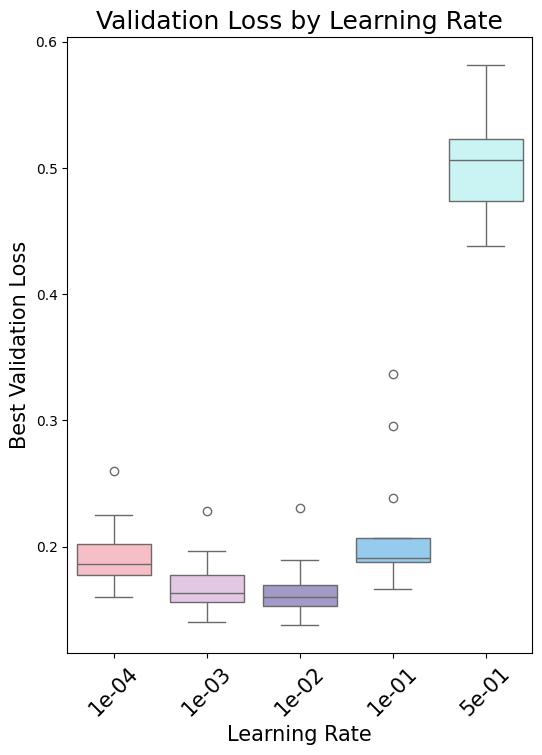

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv')

# Calculate mean and standard deviation of best_val_loss for each learning rate
best_val_loss_stats = data.groupby('learning_rate')['best_val_loss'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Best Validation Loss by Learning Rate:")
print(best_val_loss_stats)

# Define a function to format learning rates in scientific notation
def format_scientific(value):
    if value == 0:
        return '0'
    return '{:.0e}'.format(value)

# Custom color scheme
colors = {
    '1e-04': '#FFB6C1',  # light pink
    '1e-03': '#e8c3e7',  # hot pink
    '1e-02': '#9e92d0',  # sky blue
    '1e-01': '#87CEFA',  # light sky blue
    '5e-01': '#c3fbf9',
}

# Ensure the learning rates are properly formatted as strings in scientific notation
data['learning_rate'] = data['learning_rate'].apply(format_scientific)

# Filter the data to include only specific learning rates
filtered_learning_rates = ['1e-04', '1e-03', '1e-02', '1e-01', '5e-01']
filtered_data = data[data['learning_rate'].isin(filtered_learning_rates)]

# Define a custom color palette based on the predefined colors
custom_palette = [colors[lr] for lr in filtered_learning_rates]

# Plot
plt.figure(figsize=(6, 8))  # Adjusted figure size for better readability
ax = sns.boxplot(x='learning_rate', y='best_val_loss', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)

# Apply custom formatting to x-axis using scientific notation
ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)

plt.title('Validation Loss by Learning Rate', fontsize=18)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('Best Validation Loss', fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/lr_valloss.png', dpi=400)
plt.show()

Mean and Standard Deviation of Validation PCC by Learning Rate:
                   mean       std
learning_rate                    
0.0001         0.734984  0.036573
0.0010         0.756770  0.040020
0.0100         0.758194  0.034602
0.1000         0.746661  0.071002
0.5000              NaN       NaN


/tmp/slurm_7429176/ipykernel_95086/3142864654.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)
/tmp/slurm_7429176/ipykernel_95086/3142864654.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)


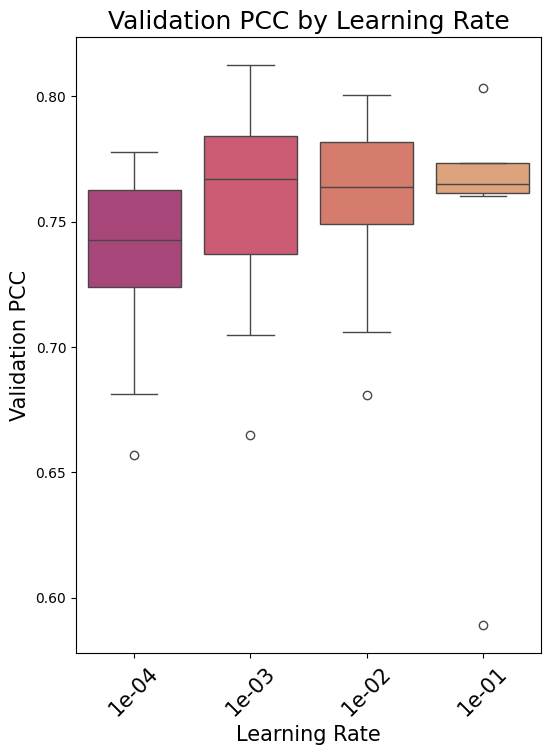

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv')

# Calculate mean and standard deviation of val_pearson_correlation for each learning rate
val_pearson_stats = data.groupby('learning_rate')['val_pearson_correlation'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Validation PCC by Learning Rate:")
print(val_pearson_stats)

# Define a function to format learning rates in scientific notation
def format_scientific(value):
    if value == 0:
        return '0'
    return '{:.0e}'.format(value)

# Custom color scheme
colors = {
    '1e-04': (0.716387, 0.214982, 0.47529),
    '1e-03': (0.868793, 0.287728, 0.409303),
    '1e-02': (0.907671, 0.439703, 0.35981),
    '1e-01': (0.924738, 0.62435, 0.427397),
}

# Ensure the learning rates are properly formatted as strings in scientific notation
data['learning_rate'] = data['learning_rate'].apply(format_scientific)

# Filter the data to include only specific learning rates (excluding '5e-1')
filtered_learning_rates = ['1e-04', '1e-03', '1e-02', '1e-01']
filtered_data = data[data['learning_rate'].isin(filtered_learning_rates)]

# Define a custom color palette based on the predefined colors
custom_palette = [colors[lr] for lr in filtered_learning_rates]

# Plot
plt.figure(figsize=(6, 8))  # Adjusted figure size for better readability
ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)

# Apply custom formatting to x-axis using scientific notation
ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)

plt.title('Validation PCC by Learning Rate', fontsize=18)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('Validation PCC', fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/val_pcc_og.png', dpi=400)
plt.show()

Mean and Standard Deviation of Validation PCC by Learning Rate:
                   mean       std
learning_rate                    
0.0001         0.734984  0.036573
0.0010         0.756770  0.040020
0.0100         0.758194  0.034602
0.1000         0.746661  0.071002
0.5000              NaN       NaN


/tmp/slurm_7557084/ipykernel_237534/4001850993.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)
/tmp/slurm_7557084/ipykernel_237534/4001850993.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)


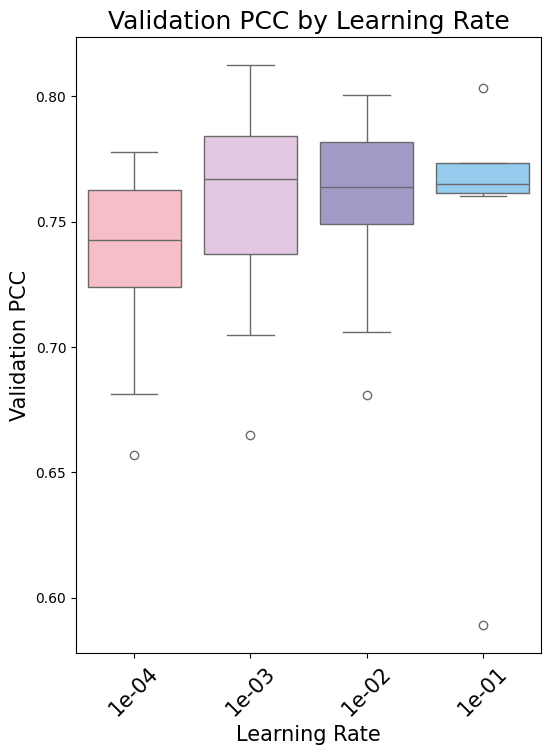

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv')

# Calculate mean and standard deviation of val_pearson_correlation for each learning rate
val_pearson_stats = data.groupby('learning_rate')['val_pearson_correlation'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Validation PCC by Learning Rate:")
print(val_pearson_stats)

# Define a function to format learning rates in scientific notation
def format_scientific(value):
    if value == 0:
        return '0'
    return '{:.0e}'.format(value)

# Custom color scheme

###ffb6c1 orangey pink

colors = {
    '1e-04': '#FFB6C1',  # light pink
    '1e-03': '#e8c3e7',  # hot pink
    '1e-02': '#9e92d0',  # sky blue
    '1e-01': '#87CEFA',  # light sky blue
}

# Ensure the learning rates are properly formatted as strings in scientific notation
data['learning_rate'] = data['learning_rate'].apply(format_scientific)

# Filter the data to include only specific learning rates (excluding '5e-1')
filtered_learning_rates = ['1e-04', '1e-03', '1e-02', '1e-01']
filtered_data = data[data['learning_rate'].isin(filtered_learning_rates)]

# Define a custom color palette based on the predefined colors
custom_palette = [colors[lr] for lr in filtered_learning_rates]

# Plot
plt.figure(figsize=(6, 8))  # Adjusted figure size for better readability
ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)

# Apply custom formatting to x-axis using scientific notation
ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)

plt.title('Validation PCC by Learning Rate', fontsize=18)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('Validation PCC', fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/val_pcc_og.png', dpi=400)
plt.show()

Mean and Standard Deviation of Validation PCC by Learning Rate:
                   mean       std
learning_rate                    
0.0001         0.734984  0.036573
0.0010         0.756770  0.040020
0.0100         0.758194  0.034602
0.1000         0.746661  0.071002
0.5000              NaN       NaN


/tmp/slurm_7557084/ipykernel_237534/2853016208.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)
/tmp/slurm_7557084/ipykernel_237534/2853016208.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)


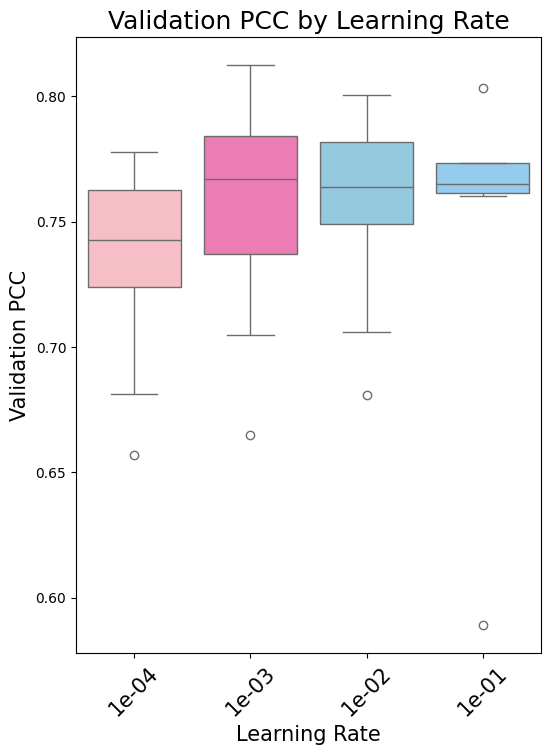

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv')

# Calculate mean and standard deviation of val_pearson_correlation for each learning rate
val_pearson_stats = data.groupby('learning_rate')['val_pearson_correlation'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Validation PCC by Learning Rate:")
print(val_pearson_stats)

# Define a function to format learning rates in scientific notation
def format_scientific(value):
    if value == 0:
        return '0'
    return '{:.0e}'.format(value)

# Custom color scheme
colors = {
    '1e-04': '#FFB6C1',  # light pink
    '1e-03': '#FF69B4',  # hot pink
    '1e-02': '#87CEEB',  # sky blue
    '1e-01': '#87CEFA',  # light sky blue
}

# Ensure the learning rates are properly formatted as strings in scientific notation
data['learning_rate'] = data['learning_rate'].apply(format_scientific)

# Filter the data to include only specific learning rates (excluding '5e-1')
filtered_learning_rates = ['1e-04', '1e-03', '1e-02', '1e-01']
filtered_data = data[data['learning_rate'].isin(filtered_learning_rates)]

# Define a custom color palette based on the predefined colors
custom_palette = [colors[lr] for lr in filtered_learning_rates]

# Plot
plt.figure(figsize=(6, 8))  # Adjusted figure size for better readability
ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)

# Apply custom formatting to x-axis using scientific notation
ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)

plt.title('Validation PCC by Learning Rate', fontsize=18)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('Validation PCC', fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/val_pcc_og.png', dpi=400)
plt.show()

Mean and Standard Deviation of Validation PCC by Learning Rate:
                   mean       std
learning_rate                    
0.0001         0.734984  0.036573
0.0010         0.756770  0.040020
0.0100         0.758194  0.034602
0.1000         0.746661  0.071002
0.5000              NaN       NaN


/tmp/slurm_7429176/ipykernel_95086/3142864654.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)
/tmp/slurm_7429176/ipykernel_95086/3142864654.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)


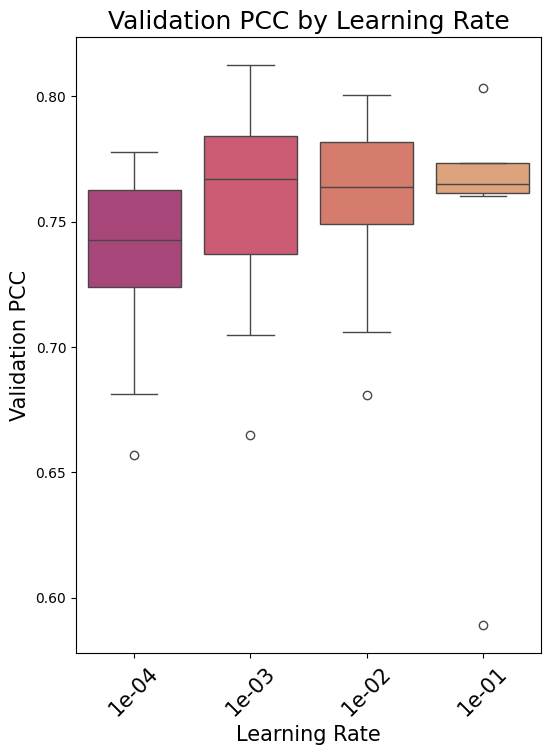

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv')

# Calculate mean and standard deviation of val_pearson_correlation for each learning rate
val_pearson_stats = data.groupby('learning_rate')['val_pearson_correlation'].agg(['mean', 'std'])
print("Mean and Standard Deviation of Validation PCC by Learning Rate:")
print(val_pearson_stats)

# Define a function to format learning rates in scientific notation
def format_scientific(value):
    if value == 0:
        return '0'
    return '{:.0e}'.format(value)

# Custom color scheme
colors = {
    '1e-04': (0.716387, 0.214982, 0.47529),
    '1e-03': (0.868793, 0.287728, 0.409303),
    '1e-02': (0.907671, 0.439703, 0.35981),
    '1e-01': (0.924738, 0.62435, 0.427397),
}

# Ensure the learning rates are properly formatted as strings in scientific notation
data['learning_rate'] = data['learning_rate'].apply(format_scientific)

# Filter the data to include only specific learning rates (excluding '5e-1')
filtered_learning_rates = ['1e-04', '1e-03', '1e-02', '1e-01']
filtered_data = data[data['learning_rate'].isin(filtered_learning_rates)]

# Define a custom color palette based on the predefined colors
custom_palette = [colors[lr] for lr in filtered_learning_rates]

# Plot
plt.figure(figsize=(6, 8))  # Adjusted figure size for better readability
ax = sns.boxplot(x='learning_rate', y='val_pearson_correlation', data=filtered_data, order=filtered_learning_rates, palette=custom_palette)

# Apply custom formatting to x-axis using scientific notation
ax.set_xticklabels(filtered_learning_rates, rotation=45, fontsize=15)

plt.title('Validation PCC by Learning Rate', fontsize=18)
plt.xlabel('Learning Rate', fontsize=15)
plt.ylabel('Validation PCC', fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/val_pcc_og.png', dpi=400)
plt.show()

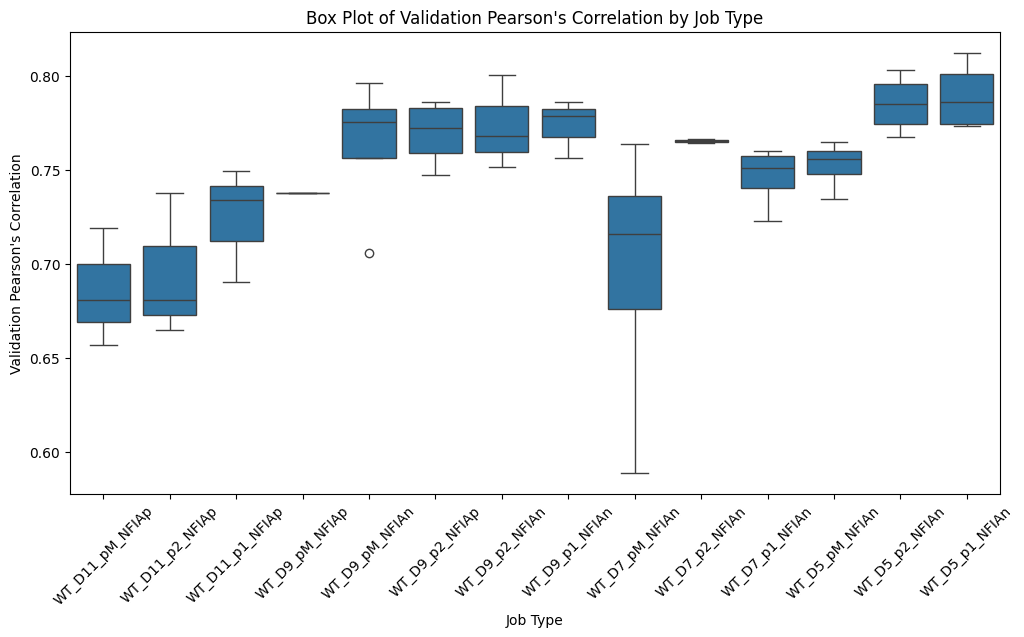

In [20]:
# Task 4: Box Plot of Validation Pearson's Correlation, Aggregated by Job Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job Type', y='val_pearson_correlation', data=data)
plt.title("Box Plot of Validation Pearson's Correlation by Job Type")
plt.xlabel('Job Type')
plt.ylabel("Validation Pearson's Correlation")
plt.xticks(rotation=45)
plt.show()

/tmp/slurm_7429176/ipykernel_95086/3108840432.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45)


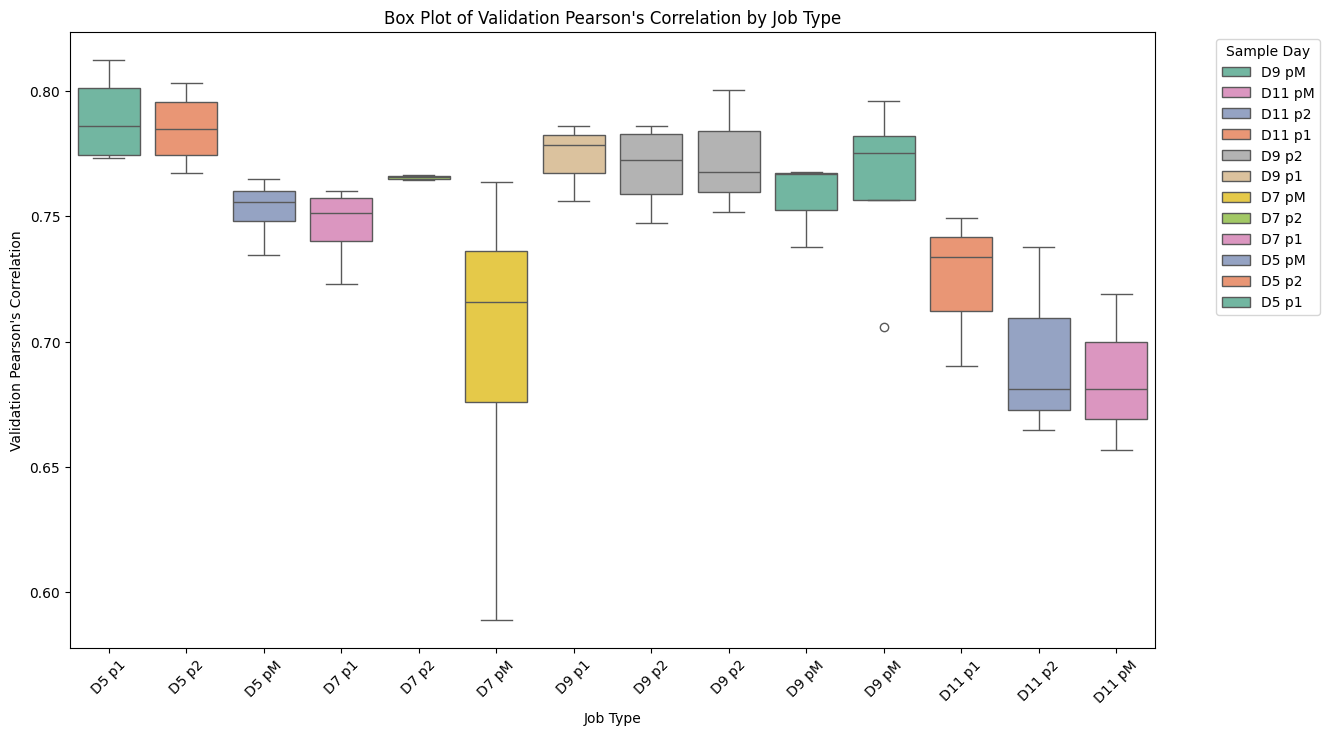

In [93]:
# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Extract sample day information from Job Type for coloring
data['Sample Day'] = data['Job Type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract and sort unique days
unique_days = sorted(data['Sample Day'].unique(), key=lambda x: (int(x.split()[0][1:]), x.split()[1]))

# Create a color palette by Sample Day
palette = sns.color_palette("Set2", n_colors=len(unique_days))
day_color_map = {day: palette[i] for i, day in enumerate(unique_days)}

# Map colors to the Sample Day
data['Color'] = data['Sample Day'].map(day_color_map)

# Sort Job Type categories to match the desired order
job_type_order = sorted(data['Job Type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Task 4: Box Plot of Validation Pearson's Correlation, Aggregated by Job Type
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Job Type', y='val_pearson_correlation', data=data, hue='Sample Day', palette=day_color_map, order=job_type_order)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45)

plt.title("Box Plot of Validation Pearson's Correlation by Job Type")
plt.xlabel('Job Type')
plt.ylabel("Validation Pearson's Correlation")
plt.legend(title='Sample Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/slurm_7429176/ipykernel_95086/2712142798.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)


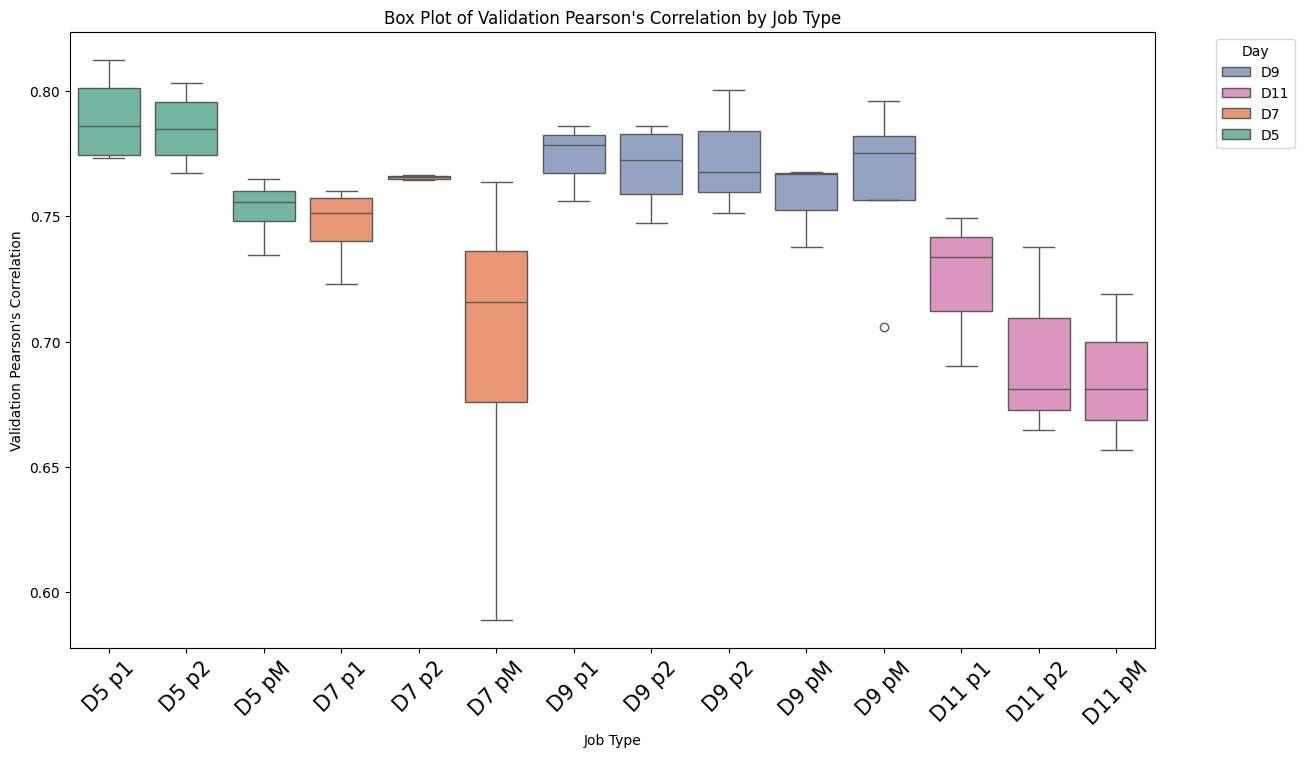

In [94]:

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Extract sample day information from Job Type for coloring
data['Sample Day'] = data['Job Type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract day information for consistent color mapping
data['Day'] = data['Job Type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(data['Day'].unique(), key=lambda x: int(x[1:]))

# Create a color palette for each day
palette = sns.color_palette("Set2", n_colors=len(unique_days))
day_color_map = {day: palette[i] for i, day in enumerate(unique_days)}

# Map colors to the Day
data['Color'] = data['Day'].map(day_color_map)

# Sort Job Type categories to match the desired order
job_type_order = sorted(data['Job Type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Task 4: Box Plot of Validation Pearson's Correlation, Aggregated by Job Type
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Job Type', y='val_pearson_correlation', data=data, hue='Day', palette=day_color_map, order=job_type_order)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

plt.title("Box Plot of Validation Pearson's Correlation by Job Type")
plt.xlabel('Job Type')
plt.ylabel("Validation Pearson's Correlation")
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/slurm_7364210/ipykernel_268070/2905424353.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=13)


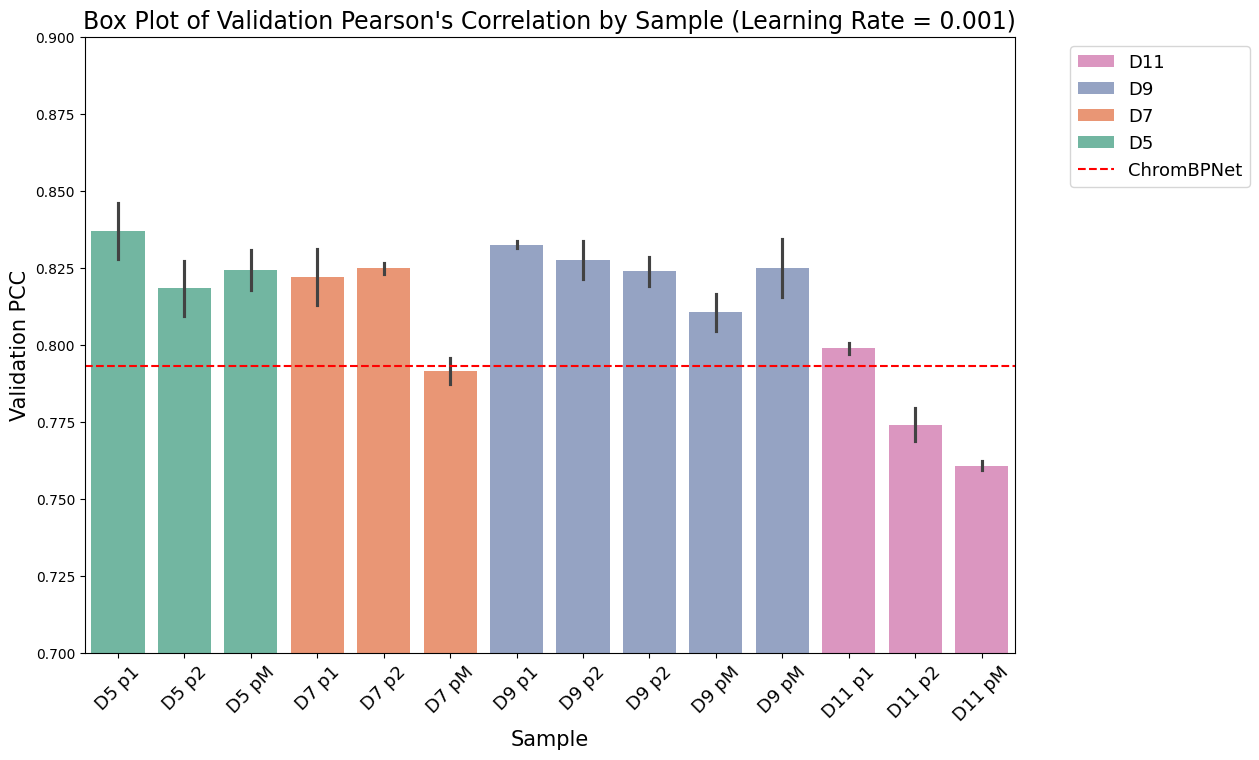

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Extract day information for consistent color mapping
data['Day'] = data['Job Type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(data['Day'].unique(), key=lambda x: int(x[1:]))

# Create a color palette for each day
palette = sns.color_palette("Set2", n_colors=len(unique_days))
day_color_map = {day: palette[i] for i, day in enumerate(unique_days)}

# Filter the data to include only rows where learning_rate is 0.001
filtered_data = data[data['learning_rate'] == 0.001]

# Sort Job Type categories to match the desired order
job_type_order = sorted(filtered_data['Job Type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Job Type', y='val_pearson_correlation', data=filtered_data, hue='Day', palette=day_color_map, order=job_type_order)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=13)

# Add a horizontal line at 0.8
plt.axhline(y=0.793, color='r', linestyle='--', label='ChromBPNet')

# Customize title and labels with fontsize 17 for the title and 15 for the axes labels
plt.title("Box Plot of Validation Pearson's Correlation by Sample (Learning Rate = 0.001)", fontsize=17)
plt.xlabel('Sample', fontsize=15)
plt.ylabel("Validation PCC", fontsize=15)

# Set y-axis limits
plt.ylim([0.7, 0.9])

# Add legend
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

# Save the figure
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/lr0.001pccwandb.png', dpi=400)

# Show the plot
plt.show()

/tmp/slurm_7429176/ipykernel_95086/1571247256.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)


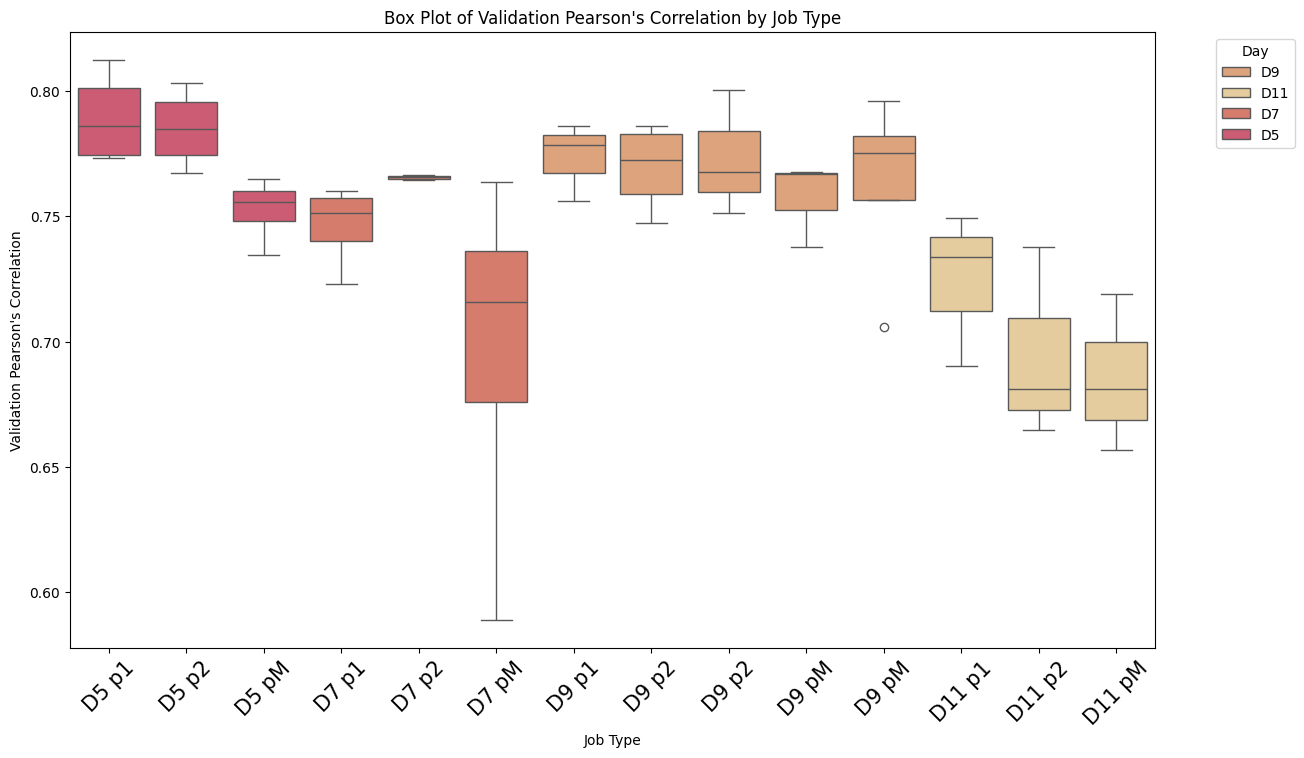

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# data = pd.read_csv('your_data.csv')  # Uncomment and update with your actual file path

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Extract sample day information from Job Type for coloring
data['Sample Day'] = data['Job Type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract day information for consistent color mapping
data['Day'] = data['Job Type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(data['Day'].unique(), key=lambda x: int(x[1:]))

# Predefined colors for specific days
day_colors = {
    'D5': (0.868793, 0.287728, 0.409303),
    'D7': (0.907671, 0.439703, 0.35981),
    'D9': (0.924738, 0.62435, 0.427397),
    'D11': (0.94568, 0.812706, 0.572645),
}


#     '5e-06': (0.716387, 0.214982, 0.47529),
#     '1e-05': (0.868793, 0.287728, 0.409303),
#     '1e-04': (0.907671, 0.439703, 0.35981),
#     '1e-03': (0.924738, 0.62435, 0.427397),
#     '1e-02': (0.94568, 0.812706, 0.572645),
        
        
# Map colors to the Day
data['Color'] = data['Day'].map(day_colors)

# Sort Job Type categories to match the desired order
job_type_order = sorted(data['Job Type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Task 4: Box Plot of Validation Pearson's Correlation, Aggregated by Job Type
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Job Type', y='val_pearson_correlation', data=data, hue='Day', palette=day_colors, order=job_type_order)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

plt.title("Box Plot of Validation Pearson's Correlation by Job Type")
plt.xlabel('Job Type')
plt.ylabel("Validation Pearson's Correlation")
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

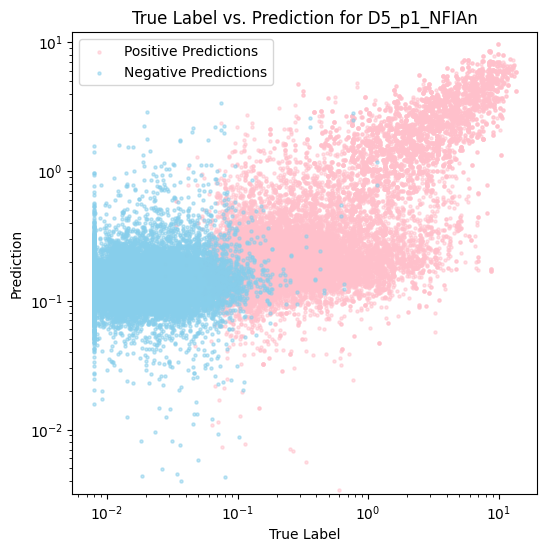

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for positive and negative predictions
pos_predictions_file = "/camp/home/weie/lab_space_weie/macs2/training_files/predictions/D5_p1_NFIAn/D5_p1_NFIAn_pos_predictions.csv"
neg_predictions_file = "/camp/home/weie/lab_space_weie/macs2/training_files/predictions/D5_p1_NFIAn/D5_p1_NFIAn_neg_predictions.csv"

# Load the data
pos_predictions = pd.read_csv(pos_predictions_file)
neg_predictions = pd.read_csv(neg_predictions_file)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(pos_predictions['True Label'], pos_predictions['Prediction'], color='pink', label='Positive Predictions',s=5,alpha=0.5)
plt.scatter(neg_predictions['True Label'], neg_predictions['Prediction'], color='skyblue', label='Negative Predictions',s=5,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('True Label')
plt.ylabel('Prediction')
plt.title('True Label vs. Prediction for D5_p1_NFIAn')
plt.legend()
plt.ylim([10**-2.5,12])
plt.show()

In [ ]:
# performance especially well for those true label>1


# Sweep Analysis



In [39]:
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-07T11_49_31.847+01_00.csv', index_col=False)
#og arch data

In [40]:
sweepD5p1=pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-08T18_16_45.268+01_00.csv', index_col=False)
sweepD11pM=pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-08T18_24_48.653+01_00.csv', index_col=False)

In [50]:
# Assuming there is only one matching row, use .iloc[0] to get the float value
d5og = data[(data['learning_rate'] == 0.01) & (data['Job Type'] == 'WT_D5_p1_NFIAn')]['best_val_loss'].iloc[0]
d11og = data[(data['learning_rate'] == 0.01) & (data['Job Type'] == 'WT_D11_pM_NFIAp')]['best_val_loss'].iloc[0]

# Print the values to confirm they are floats
print(d5og)
print(d11og)

0.1517761945724487
0.2303464114665985


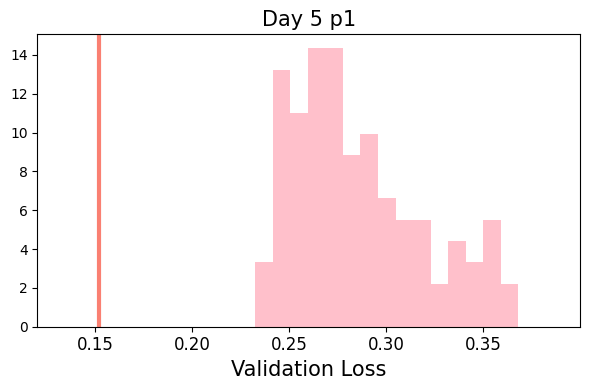

In [84]:
 plt.figure(figsize=(6, 4))
plt.hist(sweepD5p1['best_val_loss'],bins=15, density=True, color='pink')
plt.title('Day 5 p1',fontsize=15)
plt.xlabel('Validation Loss',fontsize=15)
plt.xlim([0.12, 0.4])
plt.xticks(np.arange(0.15,0.4,0.05),fontsize=12)
plt.axvline(d5og, color='salmon',label='Original Architecture',linewidth=3)
plt.tight_layout()
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/hyptund5p1.png',dpi=400)

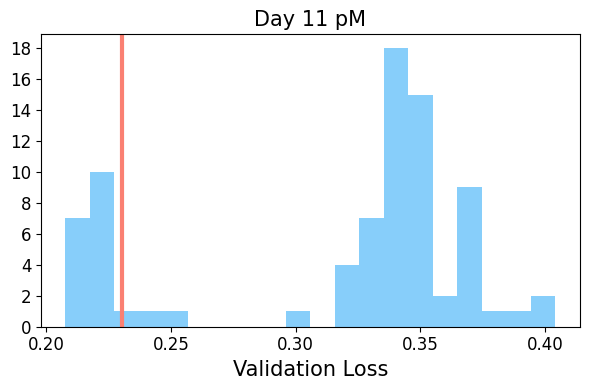

In [83]:
plt.figure(figsize=(6, 4))
plt.hist(sweepD11pM['best_val_loss'],bins=20, color='lightskyblue')
plt.xlabel('Validation Loss', fontsize=15)
plt.title('Day 11 pM',fontsize=15)
plt.yticks(np.arange(0,20,2),fontsize=12)
plt.xticks(np.arange(0.2,0.42,0.05),fontsize=12)
plt.axvline(d11og, color='salmon',label='Original Architecture',linewidth=3)
plt.tight_layout()
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/hyptund11pM.png',dpi=400)

In [21]:
import wandb

# Initialize the WandB API
api = wandb.Api()

# Replace with your actual project path (format: "entity/project_name")
project_path = "emma-/OG Architecture New"

# Fetch all runs from the specified project
runs = api.runs(project_path)
# Initialize a list to store results
results = []

# Iterate through each run to filter by learning_rate and extract PCC at best_epoch
for run in runs:
    learning_rate = run.config.get('learning_rate', None)
    
    # Check if the learning rate is 0.01
    if learning_rate == "0.01":
        # Fetch the complete run history
        history = run.scan_history()
        

        # Get the best epoch from the run's config
        best_epoch = run.summary.get('best_epoch', None)

        # Initialize variable to store the best PCC
        best_epoch_val_pcc = None

        # Iterate through the history to find the PCC at the best epoch
        for row in history:
            if row.get('epoch') == best_epoch:
                best_epoch_val_pcc = row.get('val_pearson_correlation', None)
                break
        
        
        # Store the run ID and the best epoch PCC
        results.append({
            'run_id': run.id,
            'best_epoch': best_epoch,
            'best_epoch_val_pcc': best_epoch_val_pcc,
            'job_type':job_type
        })

# Display the results
for result in results:
    print(f"Run ID: {result['run_id']}Best Epoch: {result['best_epoch']}, "
          f"Validation PCC at Best Epoch: {result['best_epoch_val_pcc']}")

dict_keys(['epochs', 'batch_size', 'learning_rate'])


KeyError: 'Job_type'

In [ ]:
wandb_export_2024-08-30T11_48_46.336+01_00.csv

In [24]:
import wandb
import pandas as pd

# Load the CSV file into a DataFrame
csv_file_path = '/camp/home/weie/lab_space_weie/ipynb/wandb_export_2024-08-30T12_07_36.450+01_00.csv'  # Replace with the actual path to your CSV file
csv_data = pd.read_csv(csv_file_path)

# Initialize the WandB API
api = wandb.Api()

# Replace with your actual project path (format: "entity/project_name")
project_path = "emma-/OG Architecture New"

# Fetch all runs from the specified project
runs = api.runs(project_path)

# Initialize a list to store results
results = []

# Iterate through each run to filter by learning_rate and extract PCC at best_epoch
for run in runs:
    learning_rate = run.config.get('learning_rate', None)
    
    # Check if the learning rate is 0.01
    if learning_rate == "0.01":
        # Fetch the complete run history
        history = run.scan_history()

        # Get the best epoch from the run's summary
        best_epoch = run.summary.get('best_epoch', None)

        # Initialize variable to store the best PCC
        best_epoch_val_pcc = None

        # Iterate through the history to find the PCC at the best epoch
        for row in history:
            if row.get('epoch') == best_epoch:
                best_epoch_val_pcc = row.get('val_pearson_correlation', None)
                best_epoch_val_loss = row.get('val_loss', None)
                break

        # Retrieve the run name
        run_name = run.name

        # Find the corresponding job type from the CSV using the run name
        job_type_row = csv_data[csv_data['Name'] == run_name]

        # Check if the job type exists in the CSV for the given run name
        if not job_type_row.empty:
            job_type = job_type_row.iloc[0]['Job Type']  # Adjust column name as per your CSV structure
        else:
            job_type = 'Unknown'

        # Store the run ID, best epoch, best epoch PCC, and job type
        results.append({
            'run_id': run.id,
            'best_epoch': best_epoch,
            'best_epoch_val_pcc': best_epoch_val_pcc,
            'best_epoch_val_loss': best_epoch_val_loss,
            'job_type': job_type
        })

# Convert the results list to a DataFrame
df_results = pd.DataFrame(results)

# Save the DataFrame to a CSV file
output_file_path = '/camp/home/weie/lab_space_weie/ipynb/best_epoch_val_pcc_results_with_job_type.csv'
df_results.to_csv(output_file_path, index=False)

print(f"Results have been saved to {output_file_path}")

Results have been saved to /camp/home/weie/lab_space_weie/ipynb/best_epoch_val_pcc_results_with_job_type.csv


/tmp/slurm_8532275/ipykernel_6000/2265125573.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sample Day'] = filtered_data['job_type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")
/tmp/slurm_8532275/ipykernel_6000/2265125573.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Day'] = filtered_data['job_type'].apply(lambda x: x.split('_')[1])
/tmp/slurm_8532275/ipykernel_6000/2265125573.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

TypeError: __init__() got an unexpected keyword argument 'titlesize'

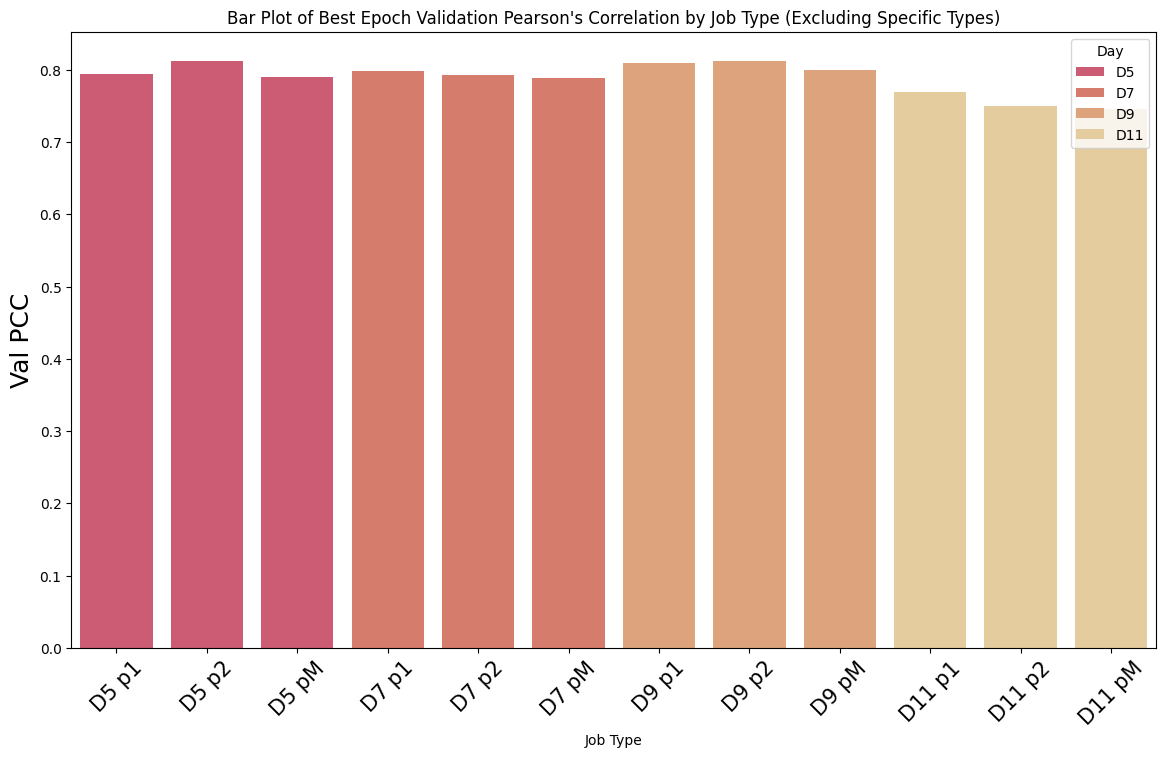

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data from CSV
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/best_epoch_val_pcc_results_with_job_type.csv')

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Exclude specific job types
exclude_job_types = ['WT_D9_pM_NFIAp', 'WT_D9_p2_NFIAp']
filtered_data = data[~data['job_type'].isin(exclude_job_types)]

# Extract sample day information from Job Type for coloring
filtered_data['Sample Day'] = filtered_data['job_type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract day information for consistent color mapping
filtered_data['Day'] = filtered_data['job_type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(filtered_data['Day'].unique(), key=lambda x: int(x[1:]))

# Predefined colors for specific days
day_colors = {
    'D5': (0.868793, 0.287728, 0.409303),
    'D7': (0.907671, 0.439703, 0.35981),
    'D9': (0.924738, 0.62435, 0.427397),
    'D11': (0.94568, 0.812706, 0.572645),
}

# Map colors to the Day
filtered_data['Color'] = filtered_data['Day'].map(day_colors)

# Sort Job Type categories to match the desired order
job_type_order = sorted(filtered_data['job_type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Task: Bar Plot of Best Epoch Validation Pearson's Correlation against Job Type
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='job_type', 
    y='best_epoch_val_pcc', 
    data=filtered_data, 
    hue='Day', 
    palette=day_colors, 
    order=job_type_order
)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

plt.title("Bar Plot of Best Epoch Validation Pearson's Correlation by Job Type (Excluding Specific Types)")
plt.xlabel('Job Type')
plt.ylabel("Val PCC", fontsize=18)
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left', titlesize=20, fontsize=15)
plt.ylim([0.6, 0.9])
plt.tight_layout()
plt.show()

/tmp/slurm_8532275/ipykernel_6000/2394232772.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sample Day'] = filtered_data['job_type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")
/tmp/slurm_8532275/ipykernel_6000/2394232772.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Day'] = filtered_data['job_type'].apply(lambda x: x.split('_')[1])
/tmp/slurm_8532275/ipykernel_6000/2394232772.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

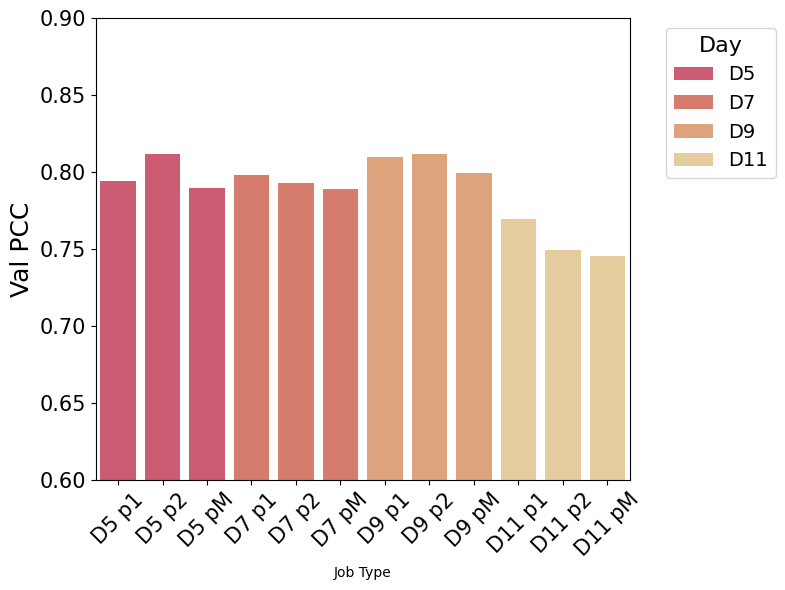

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data from CSV
data = pd.read_csv('/camp/home/weie/lab_space_weie/ipynb/best_epoch_val_pcc_results_with_job_type.csv')

# Define a function to format Job Type labels
def format_job_type(job_type):
    parts = job_type.split('_')
    if len(parts) > 2:
        return f"{parts[1]} {parts[2]}"
    return job_type

# Exclude specific job types
exclude_job_types = ['WT_D9_pM_NFIAp', 'WT_D9_p2_NFIAp']
filtered_data = data[~data['job_type'].isin(exclude_job_types)]

# Extract sample day information from Job Type for coloring
filtered_data['Sample Day'] = filtered_data['job_type'].apply(lambda x: f"{x.split('_')[1]} {x.split('_')[2]}")

# Extract day information for consistent color mapping
filtered_data['Day'] = filtered_data['job_type'].apply(lambda x: x.split('_')[1])

# Extract and sort unique days
unique_days = sorted(filtered_data['Day'].unique(), key=lambda x: int(x[1:]))

# Predefined colors for specific days
day_colors = {
    'D5': (0.868793, 0.287728, 0.409303),
    'D7': (0.907671, 0.439703, 0.35981),
    'D9': (0.924738, 0.62435, 0.427397),
    'D11': (0.94568, 0.812706, 0.572645),
}

# Map colors to the Day
filtered_data['Color'] = filtered_data['Day'].map(day_colors)

# Sort Job Type categories to match the desired order
job_type_order = sorted(filtered_data['job_type'].unique(), key=lambda x: (int(x.split('_')[1][1:]), x.split('_')[2]))

# Task: Bar Plot of Best Epoch Validation Pearson's Correlation against Job Type
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='job_type', 
    y='best_epoch_val_pcc', 
    data=filtered_data, 
    hue='Day', 
    palette=day_colors, 
    order=job_type_order
)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

# Adjust plot title and axis labels
plt.xlabel('Job Type')
plt.ylabel("Val PCC", fontsize=18)

# Adjust legend properties
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=16, fontsize=14)

# Adjust y-axis ticks and their size
plt.ylim(0.6, 0.9)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/valpcc.png',dpi=500)
plt.show()

/tmp/slurm_8532275/ipykernel_6000/837269190.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)


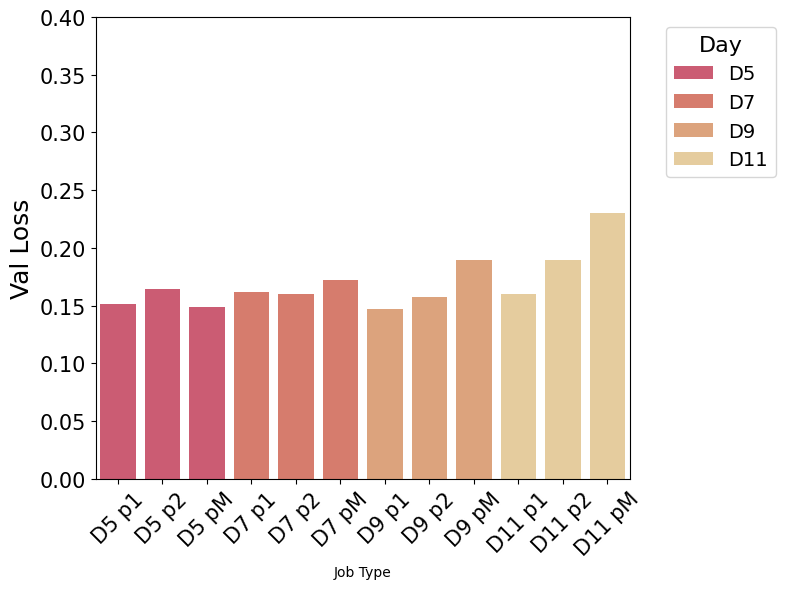

In [38]:

# Task: Bar Plot of Best Epoch Validation Pearson's Correlation against Job Type
plt.figure(figsize=(8,6))
ax = sns.barplot(
    x='job_type', 
    y='best_epoch_val_loss', 
    data=filtered_data, 
    hue='Day', 
    palette=day_colors, 
    order=job_type_order
)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_job_type(label.get_text()) for label in ax.get_xticklabels()], rotation=45, fontsize=15)

# Adjust plot title and axis labels
plt.xlabel('Job Type')
plt.ylabel("Val Loss", fontsize=18)

# Adjust legend properties
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize=16, fontsize=14)

# Adjust y-axis ticks and their size
plt.ylim(0., 0.4)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/valloss.png',dpi=500)
plt.show()